Q1

The Simple Linear Regression model is a fundamental statistical tool used to describe and infer the relationship between two variables, which are the predictor variable (x) and the outcome variable (Y). The model posits that the outcome variable can be expressed as a linear function of the predictor variable, augmented by a random error term. The mathematical representation of the model is as follows:

Y_i=β_0+β_1x_i+ε_i,
where:
x_i is the predictor variable
Y_i is the outcome variable being predicted
β_0 is the intercept coefficient, the expected value of Y when x=0
β_1 is the slope coefficient, the expected change in Y for a one-unit increase in x
ε_i is the error term, the randomness in Y not accounted by the linear relationship with x, factors such as measurement errors and randomness in the data

Note that: ε_i∼N(0,σ^2)

Given that ε_i is normally distributed and independent of x_i, the distribution of Y_i for a fixed x_i is also normally distributed:
Y_i∼N(β_0+β_1x_i,σ^2)

Since the part β_0+β_1x_i is deterministic and ε_i, the sum of them: 
Y_i∼N(β_0+β_1x_i,σ^2)
is normally distributed and Y_i is normally distributed with mean β_0+β_1x_i and variance σ^2.




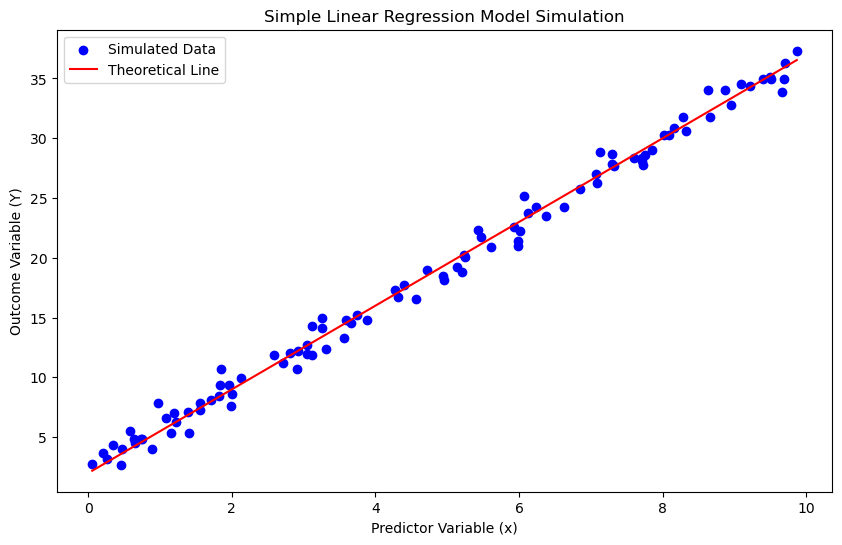

In [18]:
#Q1
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Parameters
n = 100  # Number of observations
beta0 = 2.0  # Intercept
beta1 = 3.5  # Slope
sigma = 1.0  # Standard deviation of the error term

# Generate predictor variables (x_i)
np.random.seed(42)  # For reproducibility
x = stats.uniform.rvs(0, 10, size=n)  # Uniform distribution between 0 and 10

# Generate error terms (epsilon_i)
epsilon = stats.norm.rvs(0, sigma, size=n)  # Normal distribution with mean 0 and std sigma

# Compute outcome variables (Y_i)
Y = beta0 + beta1 * x + epsilon

# Plot the theoretical line and the simulated data
plt.figure(figsize=(10, 6))
plt.scatter(x, Y, label='Simulated Data', color='blue')
plt.plot(np.sort(x), beta0 + beta1 * np.sort(x), color='red', label='Theoretical Line')
plt.xlabel('Predictor Variable (x)')
plt.ylabel('Outcome Variable (Y)')
plt.title('Simple Linear Regression Model Simulation')
plt.legend()
plt.show()


In [19]:
#Q2

import numpy as np
import pandas as pd

# Parameters
n = 100             # Number of observations
beta0 = 5           # Intercept coefficient
beta1 = 2           # Slope coefficient
sigma = 1           # Standard deviation of the error term

# Simulate predictor variable x_i
np.random.seed(0)   # For reproducibility
x = np.linspace(0, 10, n)  # Evenly spaced values between 0 and 10

# Simulate error terms epsilon_i from N(0, sigma^2)
epsilon = np.random.normal(0, sigma, n)

# Compute outcome variable Y_i
Y = beta0 + beta1 * x + epsilon

In [20]:
# Create a DataFrame
data = pd.DataFrame({
    'x': x,
    'Y': Y
})

# Display the first few rows
print(data.head())

         x         Y
0  0.00000  6.764052
1  0.10101  5.602177
2  0.20202  6.382778
3  0.30303  7.846954
4  0.40404  7.675639


In [21]:
import statsmodels.formula.api as smf

# Define the model formula
formula = 'Y ~ x'

# Fit the model
model = smf.ols(formula=formula, data=data).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     3208.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           1.09e-76
Time:                        21:28:55   Log-Likelihood:                -142.31
No. Observations:                 100   AIC:                             288.6
Df Residuals:                      98   BIC:                             293.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2085      0.201     25.867      0.0

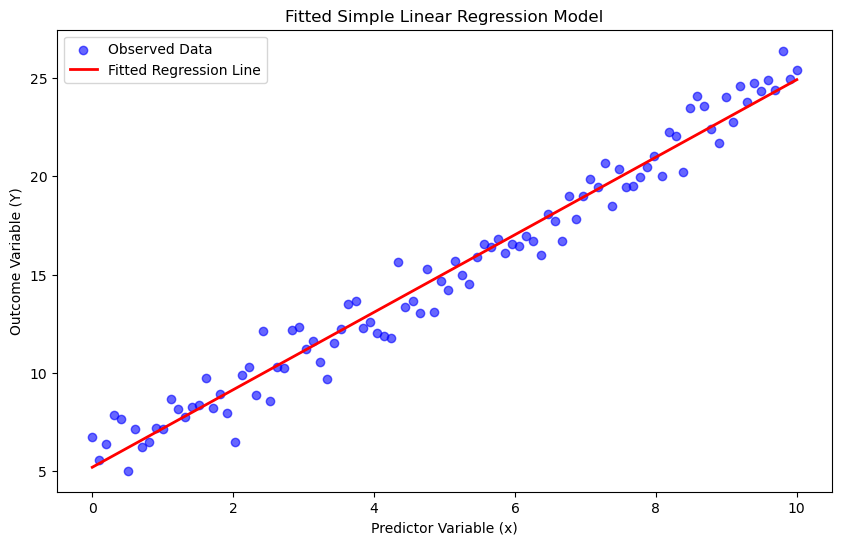

In [22]:
#Q3
import matplotlib.pyplot as plt

# Plot the observed data
plt.figure(figsize=(10, 6))
plt.scatter(data['x'], data['Y'], color='blue', alpha=0.6, label='Observed Data')

# Plot the fitted regression line
plt.plot(data['x'], model.fittedvalues, color='red', linewidth=2, label='Fitted Regression Line')


# Labels and title
plt.xlabel('Predictor Variable (x)')
plt.ylabel('Outcome Variable (Y)')
plt.title('Fitted Simple Linear Regression Model')

# Legend
plt.legend()
plt.show()

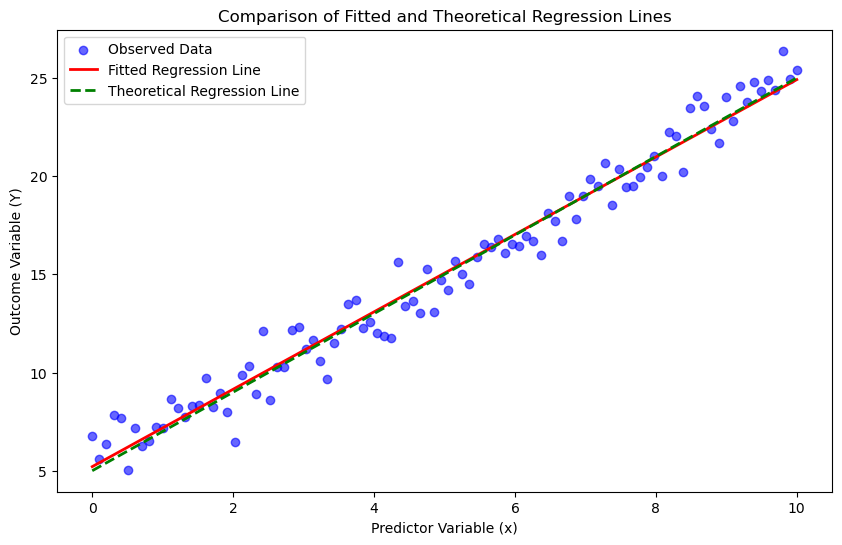

In [23]:
#Q3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Parameters (same as before)
n = 100             # Number of observations
beta0 = 5           # True intercept coefficient used in simulation
beta1 = 2           # True slope coefficient used in simulation
sigma = 1           # Standard deviation of the error term

# Simulate predictor variable x_i
np.random.seed(0)   # For reproducibility
x = np.linspace(0, 10, n)  # Evenly spaced values between 0 and 10

# Simulate error terms epsilon_i from N(0, sigma^2)
epsilon = np.random.normal(0, sigma, n)

# Compute outcome variable Y_i using the theoretical model (Question 1)
Y = beta0 + beta1 * x + epsilon

# Create a DataFrame
data = pd.DataFrame({
    'x': x,
    'Y': Y
})

# Fit the Simple Linear Regression model using statsmodels (Question 2)
formula = 'Y ~ x'
model = smf.ols(formula=formula, data=data).fit()

# Plot the observed data, fitted regression line, and theoretical line
plt.figure(figsize=(10, 6))

# Plot observed data
plt.scatter(data['x'], data['Y'], color='blue', alpha=0.6, label='Observed Data')

# Plot the fitted regression line from statsmodels
plt.plot(data['x'], model.fittedvalues, color='red', linewidth=2, label='Fitted Regression Line')

# Plot the theoretical regression line from Question 1
plt.plot(data['x'], beta0 + beta1 * data['x'], color='green', linestyle='--', linewidth=2, label='Theoretical Regression Line')

# Labels and title
plt.xlabel('Predictor Variable (x)')
plt.ylabel('Outcome Variable (Y)')
plt.title('Comparison of Fitted and Theoretical Regression Lines')

# Legend
plt.legend()
plt.show()

Q3

Theoretical Regression Line (Green dashed line):
The line represents the true underlying relationship between the predictor variable x and the outcome variable Y specified in the theoretical model.
Y=β_0+β_1x with β_0=5 and β_1=2

Fitted Regression Line (Red solid Line):
The line is the result of fitting a regression model to the simulated data, estimating the coefficients β_0 and β_1.
This reflects the best linear approximation of the relationship between x and Y based on the observed data.

The difference is due to sampling variation, that is to say, random error in simulation. This is since we added random error terms  ε_i drawn from a normal distribution N(0,σ^2)

Q4

Fitted Values (fitted_model.fittedvalues):

    Computed by applying the estimated regression equation to the observed predictor variable values.
    Represent the predicted outcomes based on the fitted model.

Estimated Coefficients (fitted_model.params):

    Contain the estimated intercept and slope obtained from fitting the regression model.
    Used directly in calculating the fitted values.

Relation to fitted_model.summary().tables[1]:

    The summary table displays the estimated coefficients along with additional statistical information.
    While useful for interpretation, it's more practical to use fitted_model.params for numerical calculations.
    
    
The fitted_model.fittedvalues are derived by substituting the observed predictor variable values into the estimated regression equation, using the coefficients obtained from fitted_model.params. The process reflects the fundamental principle of regression modeling, where we use the estimated relationship between variables to make predictions. The summary table provides a detailed overview of these coefficients, but for computational purposes, accessing the parameters directly is more efficient.

Key Takeaways:

    Fitted Values Calculation:
        Y_i=β_0+β_1x_i
        Calculated using fitted_model.params and data['x'].

    Estimated Coefficients:
        Accessed via fitted_model.params or fitted_model.params.values.
        Contain the necessary values to compute fitted values.

    Model Summary:
        fitted_model.summary().tables[1] displays the estimated coefficients and statistics.
        Useful for interpretation but less practical for calculations.

Q5

The OLS method chooses the line that best fits the observed data by finding the intercept and slope that make the total squared differences between the actual and predicted values as small as possible. The "squares" are used because they turn all residuals into positive values and give more weight to larger errors, ensuring that the fitted line reduces significant discrepancies. By minimizing these squared residuals, OLS provides the most accurate linear representation of the relationship between the variables based on the observed data.

Q6

The first expression 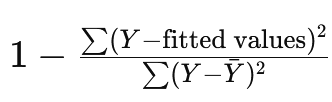 represents the R-squared value of the model

The numerator is the sum of squared residuals, which measures the variation in Y that is not explained by the model.

The denominator is the total sum of squares, representing the total variation in Y around its mean

The ratio of SSR/SST quantifies the proportion of variation in Y not explained by the model

So 1 - SSR/SST gives the proportion of variation in Y that is explained by the model's fitted values

----------

The expression above is equivalent to "fitted_model.rsquared", which direcly gives the R-squared value of the model.

This value is the standard measure of the goodness-of-fit for a regression model, indicating how well the model's predictions (fitted values) match the actual data.

----------

np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2
(Correlation Squared between Y and Fitted Values)

This expression calculates the square of the Pearson correlation coefficient between the observed values Y and the model's fitted values.

In the context of simple linear regression, this squared correlation coefficient is exactly equal to the R-squared value.

----------

np.corrcoef(Y, x)[0,1]**2
(Correlation Squared between Y and x)

This computes the square of the Pearson correlation coefficient between the observed values Y and the predictor variable x

For a simple linear regression (one predictor), this squared correlation coefficient is also equal to the R-squared value of the model. 

This measures how well x can linearly predict Y, which is what the simple linear regression model captures

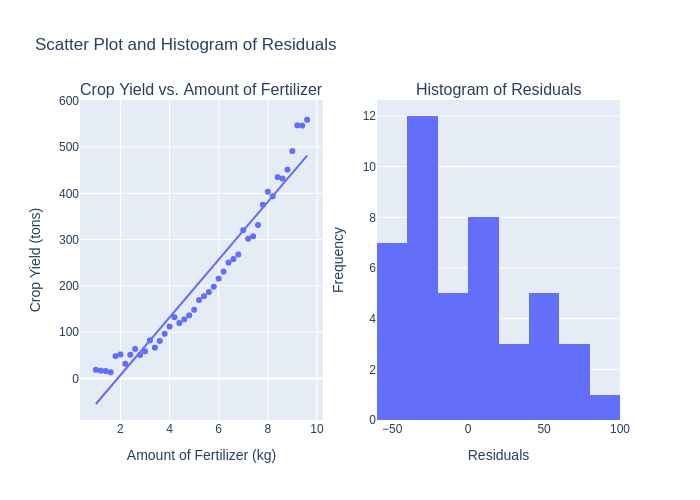

In [24]:
#Q7

import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS



Q7 continued

    Linearity:
        SLR assumes a linear relationship between the independent variable (Amount of Fertilizer) and the dependent variable (Crop Yield). However, from the scatter plot, it appears that the relationship between fertilizer and yield might not be linear. The yield initially increases slowly, then rapidly, suggesting a non-linear trend rather than a simple linear relationship. This non-linearity violates the assumption that YY changes linearly with XX.

    Homoscedasticity:
        SLR also assumes that the residuals (errors) have constant variance across all levels of the independent variable. In this case, as the amount of fertilizer increases, the variation in crop yield seems to grow, which could be seen from the residual plot. This increasing spread indicates heteroscedasticity, where residual variance is not constant, potentially affecting the reliability of the model.

    Normality of Residuals:
        Another assumption is that residuals should be approximately normally distributed. The histogram of residuals in fig2 could show if the residuals deviate significantly from normality, especially if skewed or showing multimodality, which would suggest that the errors do not meet the normality assumption.


ChatGPT Summary #1

Introduction to Simple Linear Regression: You inquired about building a Simple Linear Regression model to explore the relationship between a predictor variable x and an outcome variable Y. We discussed the theoretical formula, explaining components like intercept, slope, and error term distribution.

Data Simulation: You sought guidance on simulating data for regression analysis. I helped you generate predictor and outcome variables based on specified parameters, adding random error for realistic simulation. We covered using libraries like numpy and scipy to draw from uniform and normal distributions.

Plotting Theoretical Line and Simulated Data: For visualization, we explored plotting the theoretical regression line alongside simulated data points, adding labels and legends to differentiate each component.

Linear Regression Model Fitting: We discussed using statsmodels to fit a linear regression model. You received guidance on defining a formula for the model and extracting fitted values, coefficients, and summary statistics, along with interpreting each of these elements.

Comparison of Fitted and Theoretical Lines: I helped you overlay the fitted regression line on the plot with the theoretical line to visually assess sampling variation. We discussed why the observed and theoretical lines might differ due to random error.

Model Interpretation: You asked about interpreting fitted values and estimated coefficients from the model, and I explained their derivation using fitted_model.params. We compared this approach to directly accessing summary table values for practical calculations.

Understanding OLS: You requested an explanation of the OLS method. I described how OLS minimizes the squared residuals to achieve the best linear fit, emphasizing why squared differences are used to weight larger errors more heavily and ensure an accurate representation.

Key Insights and Calculations: We discussed the practical application of fitted values and model parameters in making predictions, summarizing key takeaways for calculating fitted values and interpreting model output.

https://chatgpt.com/c/67266f6d-7158-800d-ba57-bc656726893f

ChatGPT Summary #2

Interpretation of Expressions in Linear Regression:

    You asked about the interpretation of several expressions related to the accuracy and explanatory power of a simple linear regression model. I explained how each expression (including R2R2 and squared correlation coefficients) quantifies the proportion of variation in the outcome variable explained by the predictor, thus measuring the model’s accuracy.

Assumptions of Simple Linear Regression:

    You provided data showing the relationship between fertilizer amount and crop yield, along with visualizations. You asked which assumptions of simple linear regression (SLR) may not be compatible with this data.
    I highlighted key assumptions of SLR (linearity, homoscedasticity, and normality of residuals) and pointed out potential violations in the data, such as non-linearity and heteroscedasticity, suggesting a possible need for non-linear modeling.

Code Explanation:

    You provided a Python code snippet that performs linear regression on the fertilizer-yield data, creates a scatter plot with a regression line, and displays a histogram of residuals.
    I explained the code line-by-line, detailing the steps of data manipulation, regression analysis, prediction and residual calculation, and visualizations, helping clarify the purpose and function of each part.

Running the Code:

    You requested that I run the code. While executing it, I encountered an error because the kaleido package was missing, which Plotly needs to render static images.
    I informed you of the error and provided instructions on how to install kaleido locally, along with alternative methods for displaying the plot.
    
https://chatgpt.com/share/67267834-3c10-800d-b9c5-e381e52ffa2a

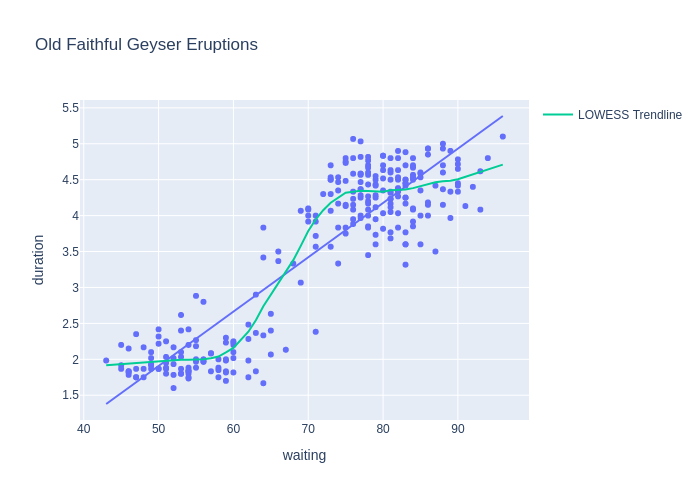

In [25]:
#Q8

import pandas as pd
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Q8 continued

Null Hypothesis (H_0)

The slope of the regression line, denotes β_1, is equal to zero:
    H_0: β_1 = 0
    
This implies that, on average, changes in waiting time do not predict changes in duration, suggesting no linear relationship between the two variables.

Alternative Hypothesis (H_1)

There is a linear association between waiting and duration, meaning that the slope β_1, is not zero:
    H_1: β_1 != 0

In [7]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Define the linear regression formula
linear_for_specification = 'duration ~ waiting'

# Fit the model
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()

# Display the summary of the fitted model
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        01:17:15   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Q8 continued

We look at the p-value column for the row waiting. The p-value is 0.000, which falls in the bracket 0.001>=p. Therefore we have Very strong evidence against the null hypothesis.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


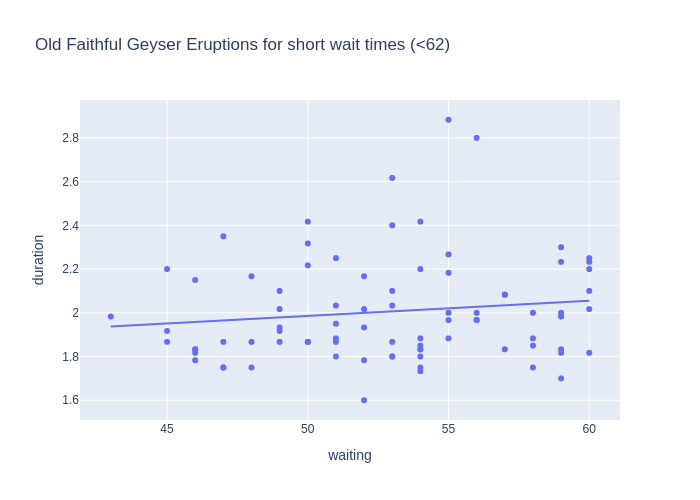

In [26]:
#Q9, 62

import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


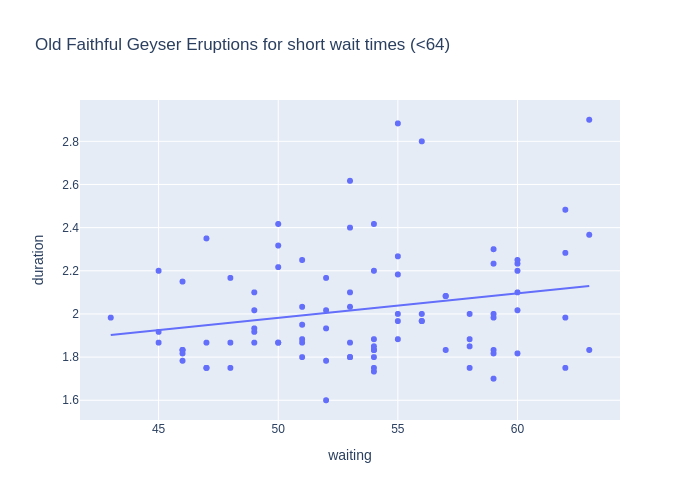

In [27]:
#Q9, 64

import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 64
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


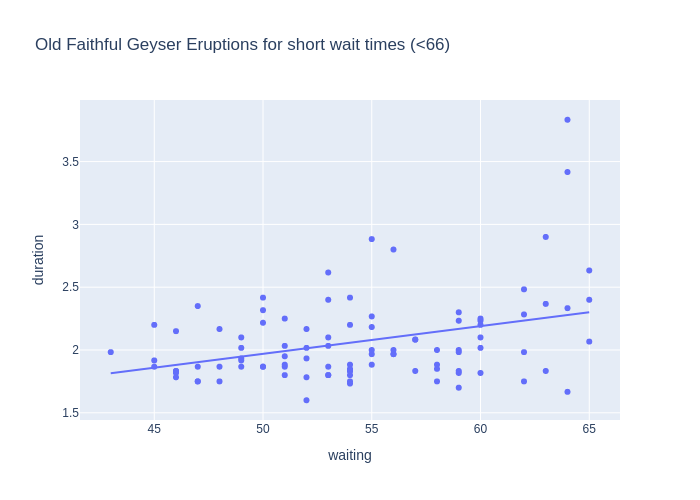

In [28]:
#Q9, 66

import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Q9 continued

The p-values

62: 0.238

64: 0.036

66: 0.000

The p-values for each short_wait_limit provide insight into the strength of the linear relationship between waiting and duration within progressively larger subsets of shorter wait times:

    short_wait_limit = 62 (p-value = 0.238):
        With a p-value of 0.238, there is no statistically significant evidence to reject the null hypothesis for wait times under 62 minutes. This suggests that, within this very restricted subset, we do not observe a significant linear relationship between waiting and duration.

    short_wait_limit = 64 (p-value = 0.036):
        For wait times under 64 minutes, the p-value drops to 0.036, which is below the common significance threshold of 0.05. This provides moderate evidence of a linear relationship between waiting and duration within this subset. As we broaden the data to include more wait times, the relationship becomes significant.

    short_wait_limit = 66 (p-value = 0.000):
        With a p-value very close to zero, there is strong evidence to reject the null hypothesis for wait times under 66 minutes. This suggests a clear, statistically significant linear association between waiting and `duration within this subset, aligning more closely with the trend observed in the full dataset.

These results indicate that for very short wait times (under 62 minutes), there’s no strong linear association between waiting and duration. However, as the wait time threshold increases to include up to 64 and 66 minutes, the linear relationship strengthens and becomes statistically significant. This might imply that the relationship observed in the full dataset primarily holds for slightly longer waiting times and begins to manifest clearly when we include wait times of around 64 minutes or more.

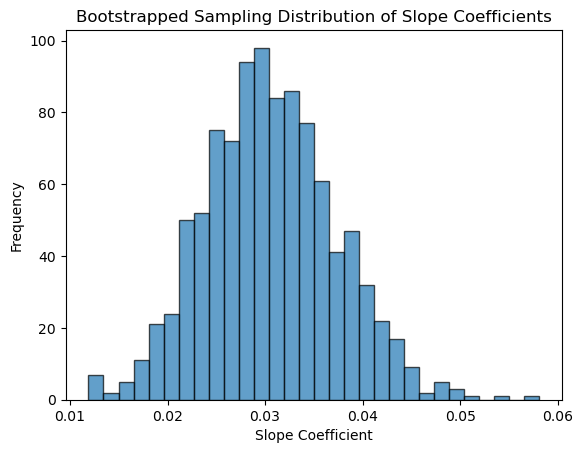

95% Bootstrapped Confidence Interval for Slope Coefficient: [0.01805676 0.04363134]


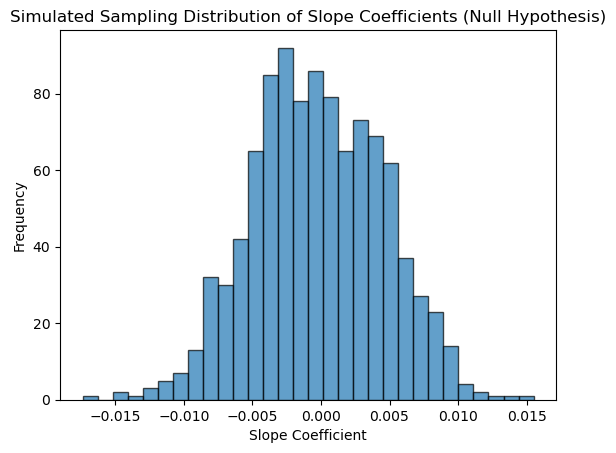

Does the 95% CI contain 0? -> False
Simulated p-value: 0.0


In [10]:
# Q10

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy import stats
import warnings

# Suppress specific FutureWarnings for cleaner output
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset and filter for long wait times
old_faithful = sns.load_dataset('geyser')
long_wait = old_faithful['waiting'] >= 66
long_wait_data = old_faithful[long_wait]

# Step 1: Bootstrapping to obtain a sampling distribution of slope coefficients
bootstrapped_slope_coefficients = []

# Number of bootstrap samples
n_bootstrap = 1000

for _ in range(n_bootstrap):
    sample = long_wait_data.sample(n=long_wait_data.shape[0], replace=True)
    model = smf.ols('duration ~ waiting', data=sample).fit()
    bootstrapped_slope_coefficients.append(model.params[1])  # Append the slope coefficient

# Visualize the bootstrapped sampling distribution of slope coefficients
plt.hist(bootstrapped_slope_coefficients, bins=30, edgecolor='k', alpha=0.7)
plt.title("Bootstrapped Sampling Distribution of Slope Coefficients")
plt.xlabel("Slope Coefficient")
plt.ylabel("Frequency")
plt.show()

# 95% Bootstrapped Confidence Interval
bootstrapped_ci = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])
print("95% Bootstrapped Confidence Interval for Slope Coefficient:", bootstrapped_ci)

# Step 2: Simulate under the null hypothesis (beta_1 = 0)
simulated_slope_coefficients = []
old_faithful_simulation = long_wait_data.copy()

for _ in range(n_bootstrap):
    # Simulate Y values under the null hypothesis of no association (beta_1 = 0)
    old_faithful_simulation['duration'] = (
        1.65 + 0 * old_faithful_simulation['waiting'] + 
        stats.norm(loc=0, scale=0.37).rvs(size=long_wait_data.shape[0])
    )
    
    # Fit the model and collect the slope coefficient
    model = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    simulated_slope_coefficients.append(model.params[1])

# Visualize the sampling distribution of slope coefficients under null hypothesis
plt.hist(simulated_slope_coefficients, bins=30, edgecolor='k', alpha=0.7)
plt.title("Simulated Sampling Distribution of Slope Coefficients (Null Hypothesis)")
plt.xlabel("Slope Coefficient")
plt.ylabel("Frequency")
plt.show()

# Step 3: Check if 0 is within the 95% bootstrapped confidence interval
contains_zero = 0 >= bootstrapped_ci[0] and 0 <= bootstrapped_ci[1]
print("Does the 95% CI contain 0? ->", contains_zero)

# Step 4: Calculate the simulated p-value
observed_slope = smf.ols('duration ~ waiting', data=long_wait_data).fit().params[1]
simulated_p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()
print("Simulated p-value:", simulated_p_value)

Q10 continued

The 95% Bootstrapped Confidence Interval for Slope Coefficient is [0.0173, 0.0433]. It represents the range of plausible values for the slope coefficient based on the bootstrapped samples. Since this interval does not contain 0, it suggests that there is a linear relationship between waiting and duration within the subset of long wait times.

For simulation under the Null Hypothesis
Since 0 is not within the bootstrapped 95% confidence interval, we have evidence to reject the null hypothesis of no linear association on average within the subset of long waiting times.

The simulated p-value of 0.0 represents the probability of observing a slope coefficient as extreme as the one we found in the actual data if there truly were no linear relationships. The p-value of 0.0 provides strong evidence against the null hypothesis, reinforcing that there is a statistically significant positive linear relationship between waiting and duration for long wait times.

Q11

Differences between models

1. Original Continuous Model: smf.ols('duration ~ waiting', data=old_faithful)

    This model treats waiting as a continuous predictor for duration
    
    The model implies a continuous, linear relationship between wait time and eruption duration across all values.
--- 
2. Shorter Wait Times Model: smf.ols('duration ~ waiting', data=old_faithful[short_wait])

    This model is restricted to tshort wait times (e.g., < 64 mintues).
    
    The model examines the linear relationship between "waiting" and "duration" within the subset of shorter wait times, allowing us to test if the relationship holds within a restricted range.
--- 
3. Long Wait Times Model: smf.ols('duration ~ waiting', data=old_faithful[long_wait])

    This model is restricted to long wait times (e.g., > 71 minutes).
    
    Similar to the shorter wait model, it tests the linearity assumption but within the subset of longer wait times.
---
4. Indicator Variable Model: smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful)

    This model uses an indicator variable to separate "short" <(68 minutes) and "long" (>= 68 minutes) wait times.
    
    Instead of assuming a continuous linear relationship, this model examines if there is a categorical difference in "duration" between two groups (short and long wait times). The focus is on comparing group means, providing a simplified, two level comparsion

Q11 continued

Evidence Against the Null Hypothesis for the new "Indicator Variable Model"

In this model, the null hypothesis is that there is "no difference in average duration for "short" and "long" wait times).

So H_0: beta_contrast = 0 (no difference between the average duration for "short" and "long" wait times).

H1: beta_contrast !=0 (a difference exists in the average duration between "short" and "long" wait times).

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


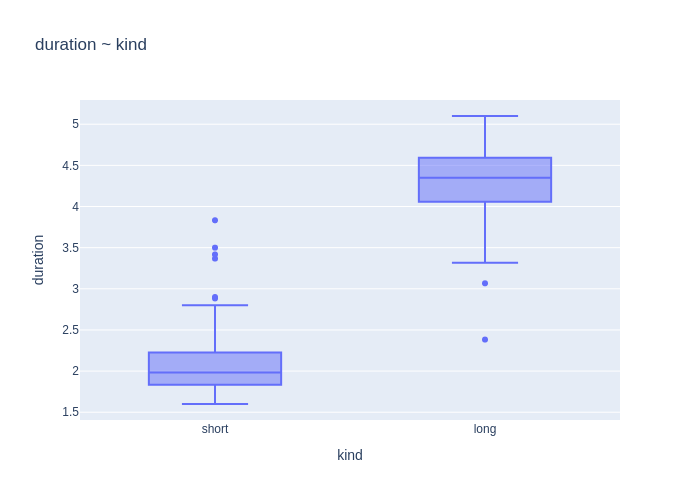

In [29]:
#Q11 continued



from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS



The p-value is reported to be 0.000, which is < 0.05. This suggests a significant difference in average duration between the two categories, providing evidence against the null hypothesis. The differences in duration is also quite clearly shown in the box-lot with the ranges of IQRs.

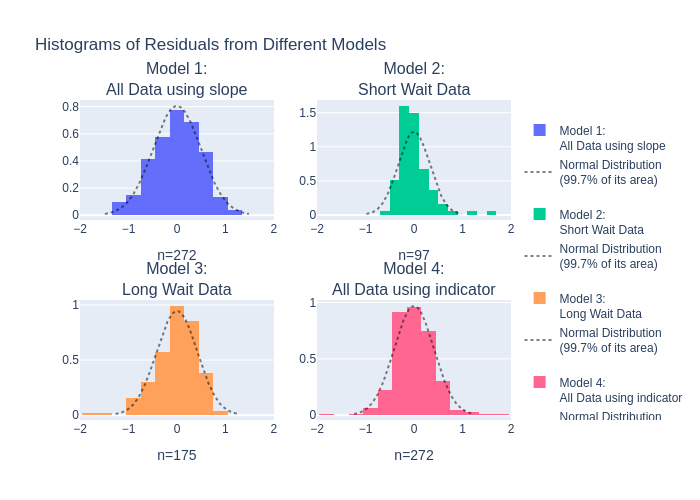

In [30]:
#Q12

from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Q12 continued
    
    Q1 supports, the rest do not.

Looking at the histograms:

    Model 1 (All Data using slope): This histogram appears the closest to a normal distribution among the four. The residuals are relatively symmetric and centered around zero, with a bell-shaped curve similar to the overlaid normal distribution. This suggests that Model 1 most closely supports the assumption of normally distributed errors.

    Model 2 (Short Wait Data): This histogram is less supportive of the normality assumption. The distribution appears skewed, with a higher concentration of residuals near zero and fewer values in the tails. This lack of symmetry and the deviation from the normal curve indicate that the errors in this model may not follow a normal distribution.

    Model 3 (Long Wait Data): Similar to Model 1, this histogram shows a bell-shaped curve, but it is slightly less smooth and may have some deviations from normality. It only somewhat supports the assumption of normal errors.

    Model 4 (All Data using indicator): The residuals in this model appear heavily concentrated around zero, with a steeper peak and fewer values in the tails compared to a normal distribution. This deviation suggests a non-normal distribution of errors.


Explanation:

    Model 1 has the histogram that is closest to a symmetric, bell-shaped distribution around zero with no significant skewness or multimodality. It would support the assumption of normal error terms. This is because the model incorporates the continuous range of waiting times.

    Models 2 and 3 (Short and Long subsets) show residual distributions that reflect unmodeled variance from the opposite wait-time group, which can skew the residuals.
    
    Model 4 captures the full variation within each category, resulting in residuals that are not bell-shaped.

In [17]:
#Q13

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

# Load the dataset and classify into "short" and "long" wait times
old_faithful = sns.load_dataset('geyser')
old_faithful['kind'] = np.where(old_faithful['waiting'] < 68, 'short', 'long')

# Part A: Permutation Test
n_permutations = 1000
observed_mean_diff = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]
permutation_diffs = []

for _ in range(n_permutations):
    shuffled = old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(frac=1, replace=False).values)
    mean_diff = shuffled.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]
    permutation_diffs.append(mean_diff)

# Calculate the p-value as the proportion of permuted mean differences as extreme as the observed mean difference
p_value_permutation = (np.abs(permutation_diffs) >= np.abs(observed_mean_diff)).mean()
print("Permutation Test p-value:", p_value_permutation)

# Part B: Bootstrap Confidence Interval
n_bootstrap = 1000
bootstrapped_mean_differences = []

for _ in range(n_bootstrap):
    bootstrap_sample = old_faithful.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)
    mean_diff = bootstrap_sample.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]
    bootstrapped_mean_differences.append(mean_diff)

# Calculate the 95% bootstrapped confidence interval
bootstrap_ci = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])
print("95% Bootstrap Confidence Interval for Mean Difference:", bootstrap_ci)


Permutation Test p-value: 0.0
95% Bootstrap Confidence Interval for Mean Difference: [2.10422776 2.30181919]


Q13 continued

This p-value indicates the probability of observing a mean difference in duration as extreme as the observed difference if there were no true difference between the "short" and "long" groups.

The p-value is 0.0, which suggests a statistically significant difference between "short" and "long" groups, supporting rejection of the null hypothesis.

---
The bootstrapped 95% confidence interval represents the range of plausible values for the mean difference between the "short" and "long" groups. The interval does not include 0, which indicates a statistically significant difference in mean duration between the two groups.



Q13 continued

Similarity:
Both the permutation test and bootstrap method, as well as the indicator variable model, aim to assess differences between two groups. All three methods test for a significant difference between "short" and "long" wait times in terms of duration.

Diferences:

The indicator variable model assumes a linear model structure, estimating the difference as a fixed coefficient and testing significance through regression.

The permutation test is non-parametric, making no assumptions about the distribution or model form. It solely relies on the observed distribution of data labels.

The bootstrap method focuses on resampling within each group, estimating the variability in group means without assuming a particular model or distribution.

Q14

    I have used ChatGPT as well as reviewed the textbook.

ChatGPT Summary #3

Initial Setup and Data Exploration

    Old Faithful Geyser Dataset: We began by loading the Old Faithful Geyser dataset, using waiting as the predictor variable (the time between eruptions) and duration as the response variable (the length of each eruption). We created visualizations with scatter plots and trendlines (OLS and LOWESS) to assess the relationship between waiting and duration.

    Linear Regression and Hypothesis Testing: We specified a null hypothesis, H0:β1=0H0​:β1​=0, indicating no linear association between waiting and duration. Using an Ordinary Least Squares (OLS) regression, we tested the significance of the slope coefficient, finding a small p-value, suggesting a significant linear relationship.

Analysis by Wait Time Categories

    Subsetting Data by Wait Times: We analyzed subsets based on "short" and "long" wait times, initially defining "short" as <64 minutes and "long" as >71 minutes. We then fitted linear regression models separately for each subset to examine if the linear relationship between waiting and duration held within these restricted ranges.

    Updated Wait Time Definition and Indicator Variable Model: Next, we redefined "short" and "long" wait times, setting <68 minutes as "short" and ≥68 minutes as "long." We introduced an indicator variable model using a categorical variable, kind, to capture this distinction, focusing on the difference in duration means between the two groups. The indicator model allowed us to see if there was a significant difference in duration based on wait time categories without assuming a continuous linear relationship.

    Comparing Models: We compared the indicator variable model with the previous continuous models:
        Continuous models assumed a linear relationship across all data or within a specific subset (either "short" or "long" wait times).
        The indicator variable model used a binary variable to distinguish "short" and "long" categories, simplifying the analysis to a difference in means between these groups.

Residual Analysis for Normality Assumption

    Histograms of Residuals: To assess whether the residuals met the normality assumption, we plotted histograms for the residuals from each model:
        Model 1: Continuous model on all data.
        Model 2: Continuous model on "short" data.
        Model 3: Continuous model on "long" data.
        Model 4: Indicator variable model.
    We examined each histogram to see if it aligned with a bell-shaped, symmetric normal curve. The continuous model on all data (Model 1) was likely to have residuals closest to a normal distribution, while the subsets ("short" and "long" models) could show deviations due to restricted ranges of waiting times.

Permutation Test and Bootstrap Confidence Interval for Mean Differences

    Permutation Test for Mean Differences: To test for a difference in duration between "short" and "long" wait times without assuming normality, we conducted a permutation test:
        Hypothesis: H0:μshort=μlongH0​:μshort​=μlong​ (no difference in mean duration between the two groups).
        Process: We shuffled the kind labels (short and long) and recalculated the mean difference for each permutation. The p-value represented the proportion of shuffled mean differences that were as extreme as the observed difference, indicating whether any observed difference was likely due to chance.

    Bootstrap Confidence Interval for Mean Differences: We created a 95% bootstrap confidence interval to capture the difference in mean duration between the "short" and "long" wait groups:
        Process: We bootstrapped within each group, resampled with replacement, and calculated the difference in means for each bootstrap sample. The 95% confidence interval was constructed using the 2.5th and 97.5th percentiles of these bootstrapped differences. If this interval did not include 0, it suggested a statistically significant difference in duration between the two groups.

Comparison of Permutation, Bootstrap, and Indicator Variable Approaches

    Comparing Methods:
        Indicator Variable Model: Assumes a structured linear model with a coefficient representing the difference in group means. This method is effective when we assume that the difference in duration between categories is stable and can be represented as a fixed regression coefficient.
        Permutation Test: Non-parametric, making no assumptions about distribution or model structure. This approach solely relies on observed values and shuffling group labels, ideal for testing differences between groups without assuming any model form.
        Bootstrap Method: Estimates the sampling variability of the mean difference through resampling, creating a confidence interval that reflects plausible values for the difference in means. It’s useful when interested in a distribution-based estimate without assuming normality.

Summary of Findings

    Evidence for Relationship: The original continuous model and subsequent subset analyses demonstrated a statistically significant relationship between waiting and duration.
    Differences between Short and Long Groups: The indicator variable model, permutation test, and bootstrap confidence interval all indicated a meaningful difference in eruption duration between "short" and "long" wait times.
    Model Validity: Model residuals were examined for normality, with the continuous model across all data likely providing the most normal distribution of errors.
    
https://chatgpt.com/share/672d3241-7fec-800d-9605-191ff3817033